In [1]:
import numpy
import matplotlib.pyplot as plt
import cv2
from subprocess import call
import os
import json
import glob

Writing frame (0): True
Writing frame (5000): True
Writing frame (10000): True
Writing frame (15000): True
Writing frame (20000): True
Writing frame (25000): True
['./src/img_vid1\\frame0.jpg', './src/img_vid1\\frame10000.jpg', './src/img_vid1\\frame15000.jpg', './src/img_vid1\\frame20000.jpg', './src/img_vid1\\frame25000.jpg', './src/img_vid1\\frame5000.jpg']


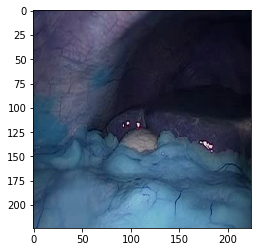

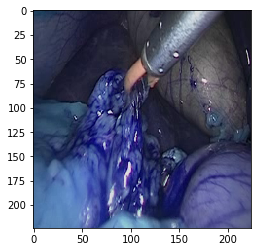

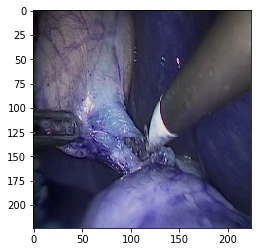

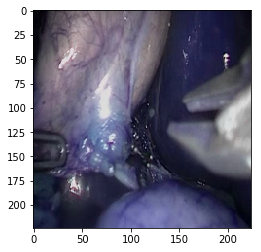

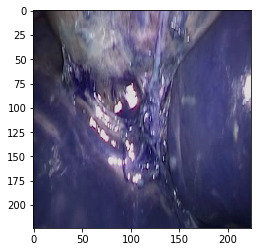

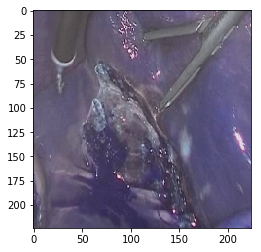

In [4]:
# Link to video location here
video = cv2.VideoCapture('./tool_video_04.mp4')
success, image = video.read()
count = 0
success = True

image_crop = image[60:284, 140:480]
image_resize = cv2.resize(image_crop, (224,224))
# plt.imshow(image)
# plt.figure()
# plt.imshow(image_crop)
# plt.figure()
# plt.imshow(image_resize)

# Load video and extract frames here and save to specified location
while success:
    # Read every frame
    success, image = video.read()
    if (success):
        image_crop = image[60:284, 140:480]
        image_resize = cv2.resize(image_crop, (224,224))
        if (count%5000==0):
            cv2.imwrite("./src/img_vid1/frame%d.jpg"%count, image_resize)
            print('Writing frame (' + str(count) + '): ' + str(success))
            plt.figure()
            plt.imshow(image_resize)

        count+=1
    
# Copy files to source destination
# call(["cp", "-pR", "./img_vid1", "./src/"])

# Write filenames to a json file
filenames = glob.glob('./src/img_vid1/*.jpg')
print(filenames)

# Create a json formatted string 
# data = {'filenames': filenames}
data = filenames

with open('./src/filenames.json', 'w') as fn:
    json.dump(data, fn, ensure_ascii=False)
    
# Run the server from here for annotating data
# call(["node", "./server/server.js", "&"])
# call(["npm","start", "&"])
# os.system("node ./server/server.js &")
# os.system("npm start &")